<a href="https://colab.research.google.com/github/bhrshabani/Loan-prediction/blob/main/rain_in_astr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import libraries

In [1]:
pip install django

     |████████████████████████████████| 7.9 MB 5.1 MB/s 


In [77]:

# import libraries
import pandas as pd
import numpy as np
from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import plotly
sns.set_style('white')
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from collections import Counter 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 1000)
pd.set_option('max_rows',40)
pd.set_option('max_columns',1000)

##Load data

In [3]:
#load data
uploaded = files.upload()
#store the data
dataset = pd.read_csv("weatherAUS.csv")
dataset.head()

Saving weatherAUS.csv to weatherAUS.csv


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data = dataset.copy()

In [5]:
data.shape

(145460, 23)

## Data&Value description

data has 145460 samples and 23 features

In [6]:
data.shape

(145460, 23)

In [7]:
# fearures name
print(data.columns.values)

['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine'
 'WindGustDir' 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am'
 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm'
 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm' 'RainToday' 'RainTomorrow']


Target value is 'RainTomorrow'

In [8]:
#check_target values
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Data has null values and categorical values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Data discription shows data has outlier and in most of vlaues are not normal

In [10]:
#describe numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [11]:
# describe the categorical data
data.describe(include=['O']).T

,count,unique,top,freq
Date,145460,3436,2016-09-13,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


Date is not a categorical value we should change it to by datetime

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
#find the unique values for each column
data.apply(lambda x:x.nunique())

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [14]:
data.dropna(subset=['RainTomorrow'],inplace=True) 

In [15]:
data.shape

(142193, 23)

## Exploratory Data Analysis


1.   Missing values
2.   Numerical
2.   Outlier
3.   Categorical
5.   Imbalance dataset
6.   Correration


- we also drop 'location' feature because it is not useful for weather prediction

In [16]:
data = data.drop(['Location'], axis=1)

### 1. Missing values

21 of features have missing values. Target also has missing vlaues

In [17]:
data.isnull().mean()*100

Date              0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64

## 2. Numerical Features
-	temporal
- discrete
-continuous

In [18]:
Numerical_features = data.select_dtypes(exclude='object')
print( Numerical_features.columns)
print("===============================================")
print('number of Numerical_features: {}'.format(len(Numerical_features.columns)))


Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
number of Numerical_features: 17


### temporal features

In [19]:
temporal_features = data.select_dtypes(include='datetime64')
print(temporal_features.columns)
print('===============================================')
print('number of temporal_features: {}'.format(len(temporal_features.columns)))

Index(['Date'], dtype='object')
number of temporal_features: 1


### Discrete Features

In [20]:
discrete_features = data.select_dtypes(include='int64')
print(discrete_features.columns)
print('===============================================')
print('number of Discrete features: {}'.format(len(discrete_features.columns)))


Index([], dtype='object')
number of Discrete features: 0


### Continuous Features

In [21]:
continous_features = data.select_dtypes(include='float64')
print(continous_features.columns)
print('===============================================')
print('number of continous features: {}'.format(len(continous_features.columns)))

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
number of continous features: 16


### Univariate

Histograms show most of the variables are skewed

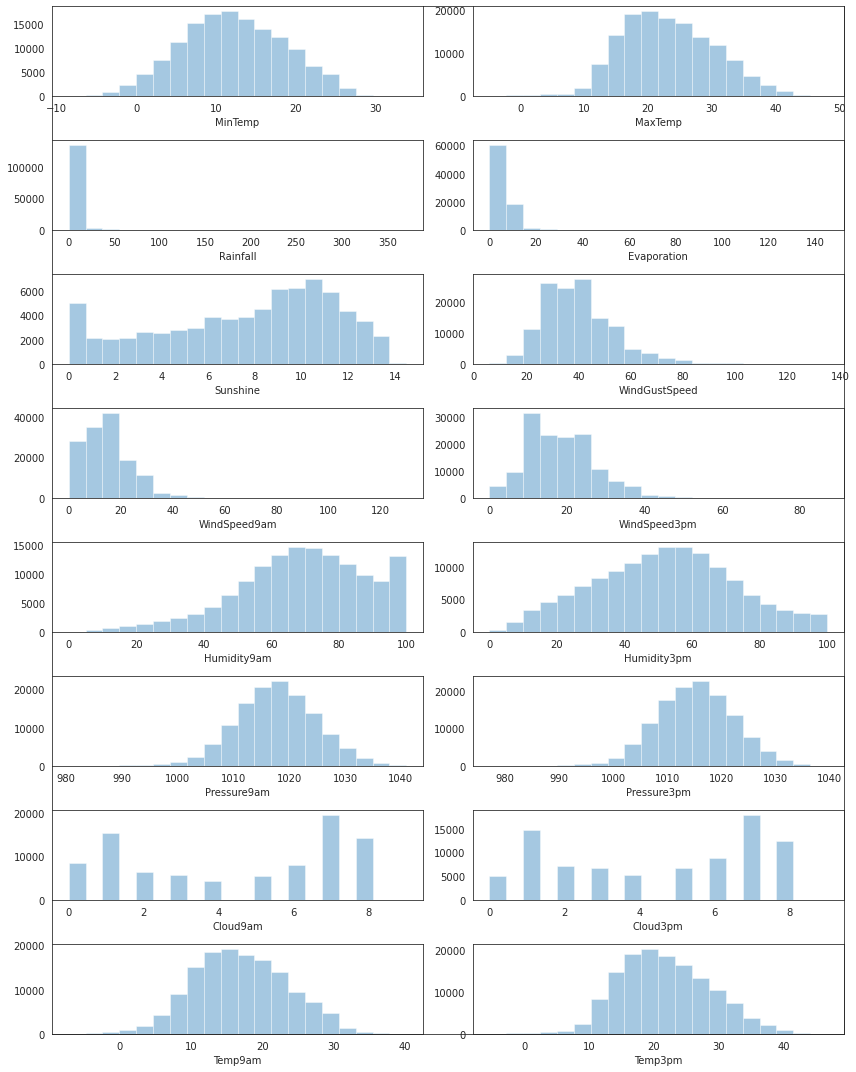

In [22]:
# Histogram plot
fig,axes = plt.subplots(figsize=(12,15))
axes.grid(False)
axes.set_yticklabels([])
axes.set_xticklabels([])
for idx,num_col in enumerate(continous_features):
    fig.add_subplot(8, 2, idx+1)
    sns.distplot(data[num_col], kde=False, bins=20)
    fig.tight_layout()

## 3. OUTLIER

Boxplots confirm that there are outliers in these variables. So range of them should be considered.

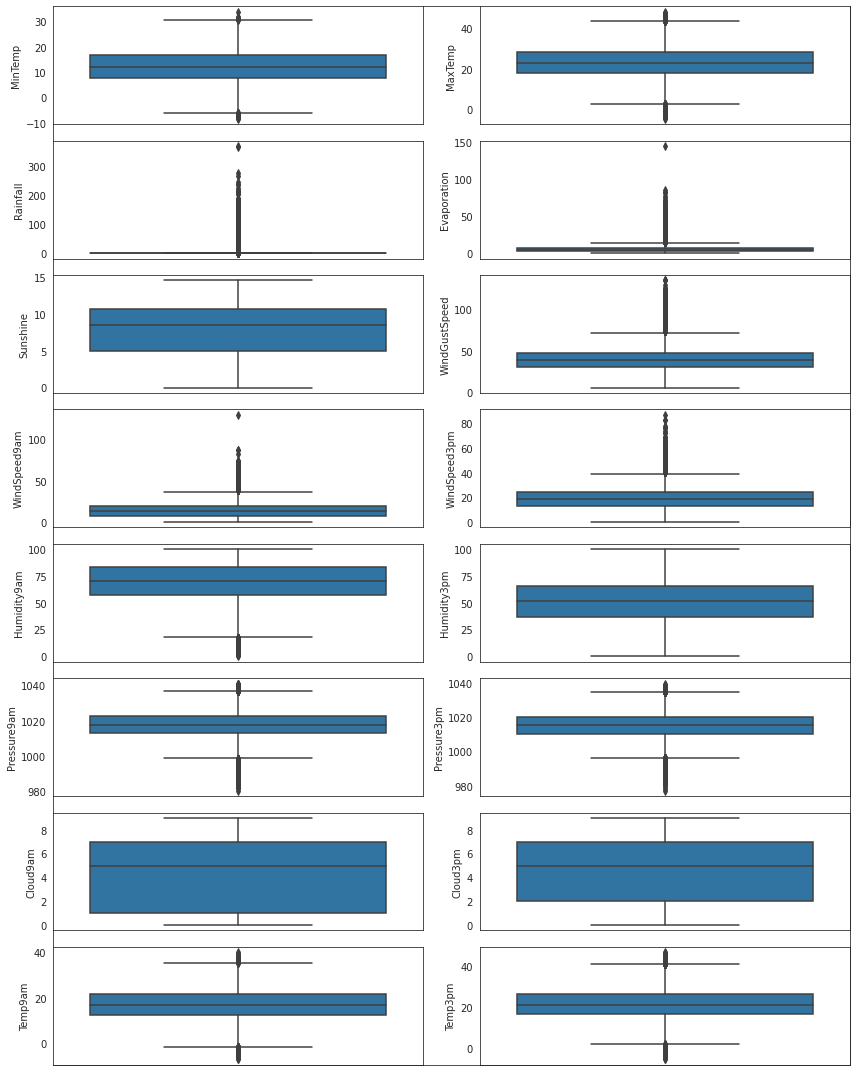

In [23]:
fig,axes = plt.subplots(figsize=(12,15))
axes.grid(False)
axes.set_yticklabels([])
axes.set_xticklabels([])
for idx,num_col in enumerate(continous_features):
    fig.add_subplot(8, 2, idx+1)
    sns.boxplot(data=data[num_col].dropna(), y=data[num_col])
    fig.tight_layout()

### Bivariate

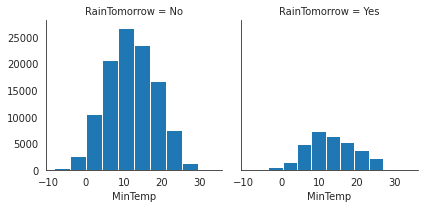

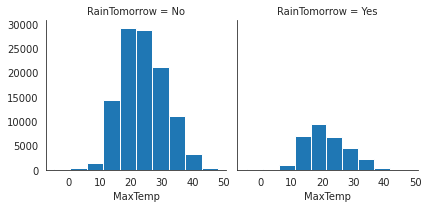

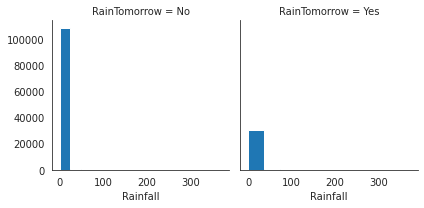

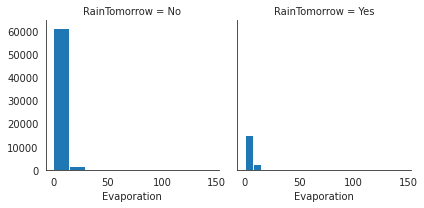

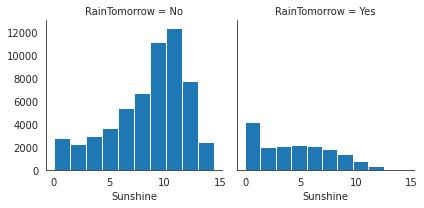

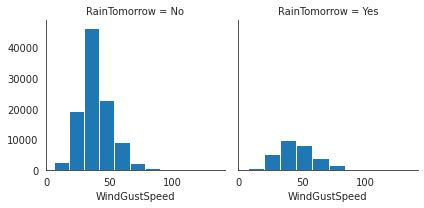

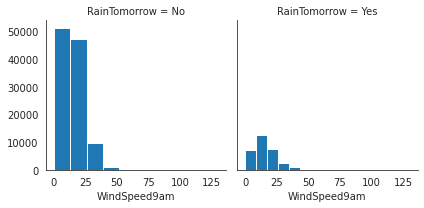

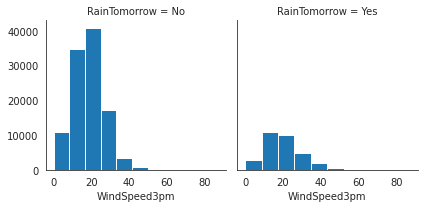

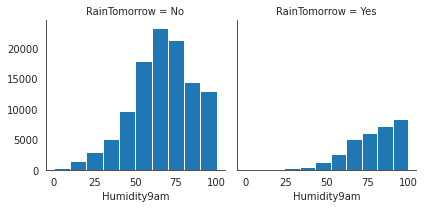

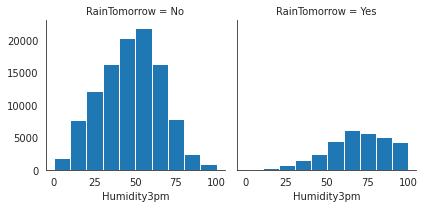

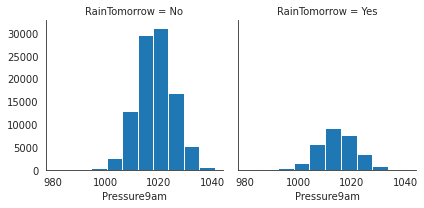

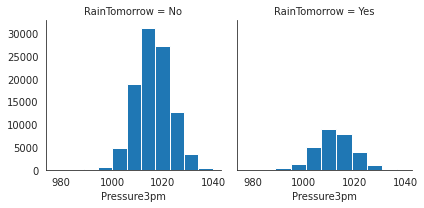

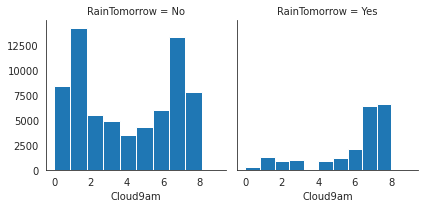

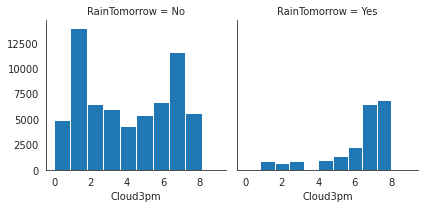

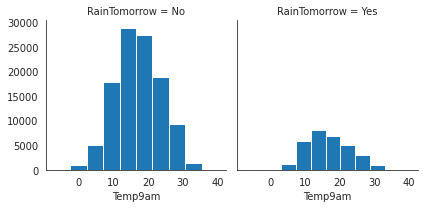

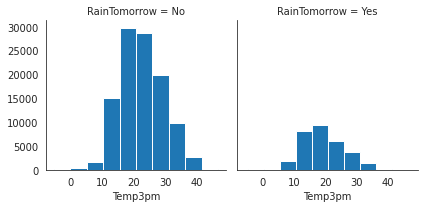

In [24]:
for num_col in continous_features:
  g = sns.FacetGrid(data, col='RainTomorrow')
  g.map(plt.hist, num_col, bins=10)

## 4. Categorical Features

Categorical features plot shows that 'WindGustDir', 'WindDir9am', 'WindDir3pm' have a lot of categories and 'RainToday' 2 category which can easliy handle by getdummies

In [25]:
categorical_features = data.select_dtypes(include='object')
print(categorical_features.columns)
print('===============================================')
print('number of Categorical features: {}'.format(len(categorical_features.columns)))

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')
number of Categorical features: 5


In [26]:
categorical_features = categorical_features.drop(['RainTomorrow'], axis=1)

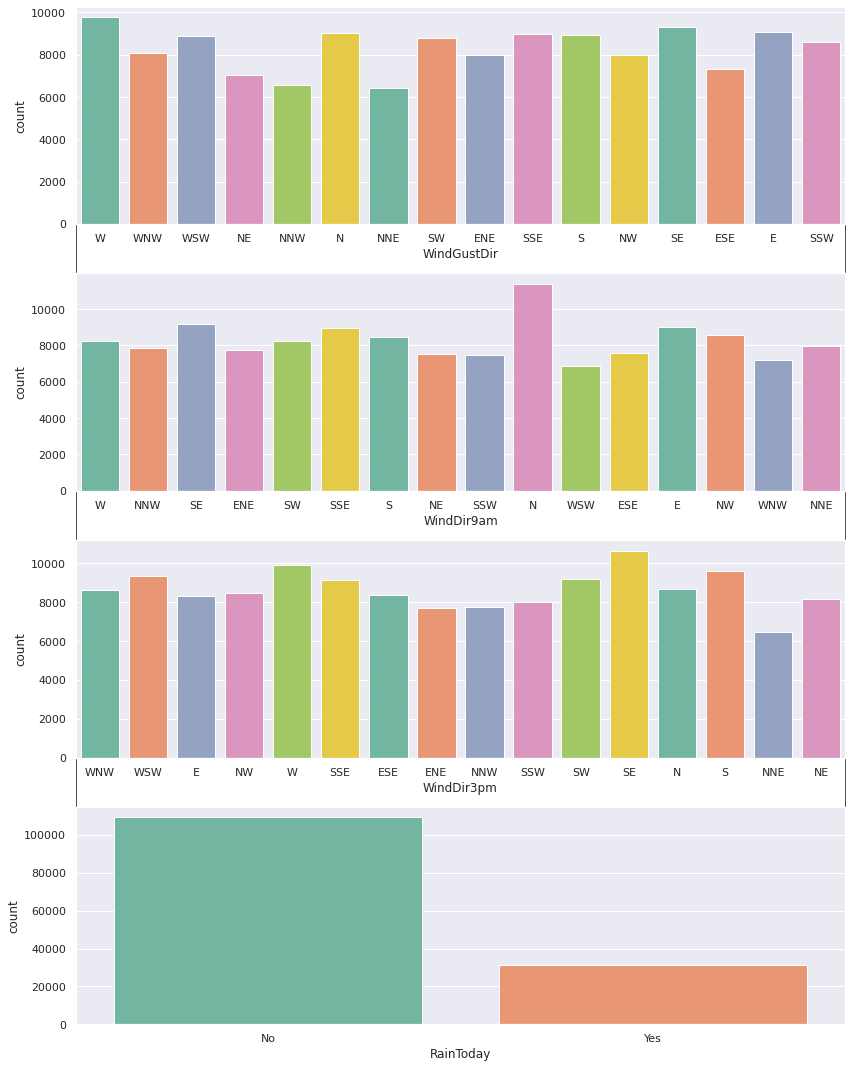

In [27]:

fig,axes = plt.subplots(figsize=(12,15))
rgb_values = sns.color_palette("Set2", 6)
axes.grid(False)
axes.set_yticklabels([])
axes.set_xticklabels([])
sns.set_theme(style="darkgrid")
for idx,cat_col in enumerate(categorical_features):
    fig.add_subplot(4, 1, idx+1)
    sns.countplot(x=cat_col, data=data, palette=rgb_values)
    fig.tight_layout()

###Bivariate plot

RainToday feature shows that the if today is rainy, tommorow will most likely be rainy

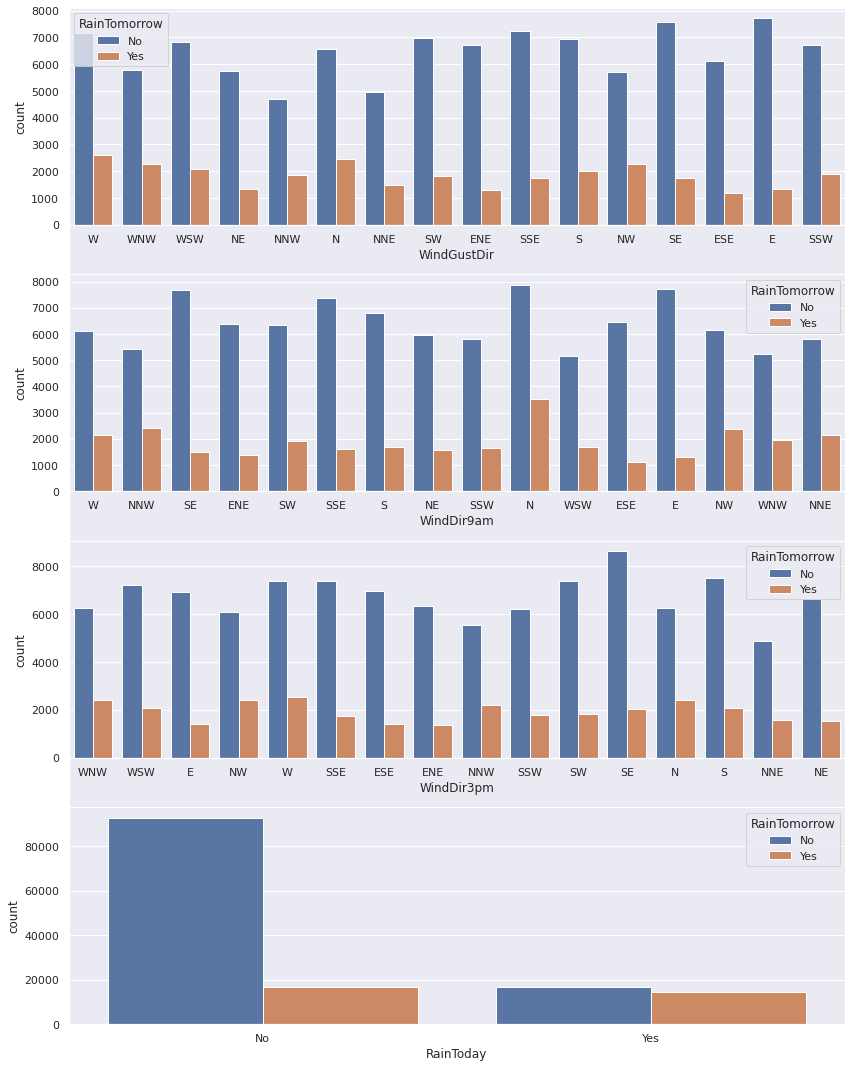

In [28]:
fig,axes = plt.subplots(figsize=(12,15))
axes.grid(False)
axes.set_yticklabels([])
axes.set_xticklabels([])
sns.set_theme(style="darkgrid")
for idx,cat_col in enumerate(categorical_features):
    fig.add_subplot(4, 1, idx+1)
    sns.countplot(x=data[cat_col],data=data,hue='RainTomorrow')
    fig.tight_layout()


## 5.imbalance dataset

In [29]:
#control the percent of target values
data['RainTomorrow'].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

Target value is imbalanced so it should be handle befor training



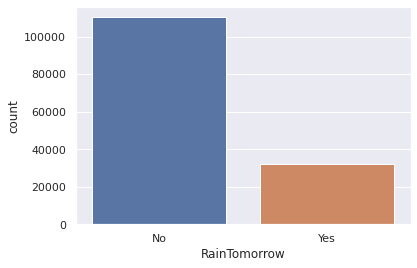

In [30]:
# plot target value
sns.countplot(x='RainTomorrow', data=data)

## 6.Features correlation

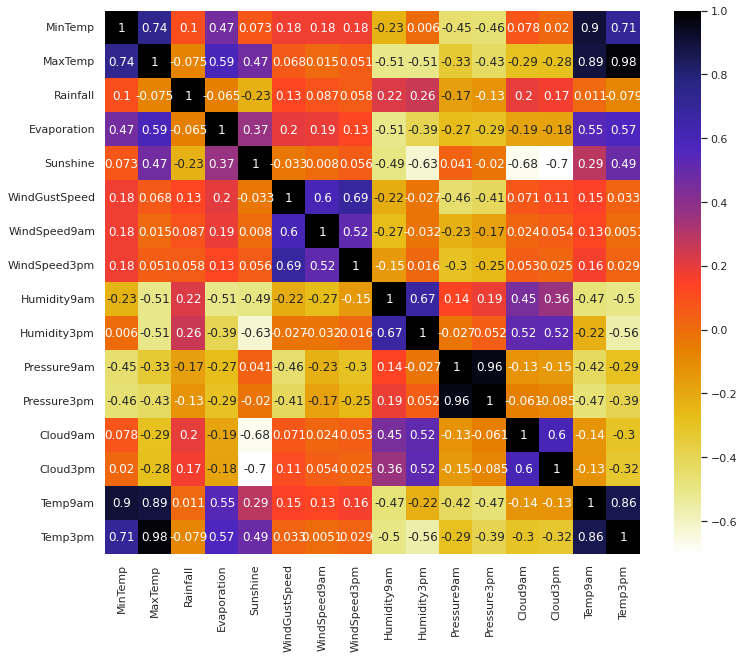

In [31]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

1.  **max and min temp**  are correlated to each other and strongly correlated to **temp9am and temp3pm**.
2.  **temp9am and temp3pm** are correlated to each other.
2. **windguestspeed, windspeed3am, windspeed9am** are correlated to each other
3. **Evaporaion** are correlated to **max, min temp, temp9am and temp3pm**.
- So we can drop some of these variables with highly correlation

In [32]:
data = data.drop(['Temp9am', 'Temp3pm' ], axis=1)

# Preprocess


1.   Handling missing values
2.   Handling Outlier
3.   Handling Categorical features
5.   feature Engine


## 1. Handling missing values


### Handling continuous missing values with two method 
For values that are missed more than 10 percent, the random value imputation are best and dont change the data distribution  and for other median is applied

In [33]:
features= ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Pressure9am', 'Pressure3pm' ]
for feature in features:
       ##It will have the random sample to fill the na
       random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
       ##pandas need to have same index in order to merge the dataset
       random_sample.index=data[data[feature].isnull()].index
       data.loc[data[feature].isnull(),feature]=random_sample

In [34]:
continous_features = continous_features.drop(['Temp9am', 'Temp3pm'], axis=1)

In [35]:
for feature in continous_features.isnull():
    data[feature].fillna(data[feature].median(), inplace=True)

### Handling categorical missing values with mode

In [36]:
for feature in categorical_features.isnull():
    data[feature].fillna(data[feature].mode()[0], inplace=True)

In [37]:
data.isnull().mean()*100

Date             0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

## 2. Handling Outlier
we have outlier in 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Humidity9am', 'Pressure9am', 'Pressure3pm', WindGuestSpeed
     


If The Data Is skewed Distributed We use this


In [38]:
skewed_features = ['MaxTemp', 'MinTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'Humidity9am','Pressure9am', 'Pressure3pm', 'WindSpeed9am', 'WindSpeed3pm']

In [39]:
def low_upper_band(X_data, feature):
           #### Lets compute the Interquantile range to calculate the boundaries
           IQR=data[feature].quantile(0.75)-data[feature].quantile(0.25)
           #### Extreme outliers
           lower_bridge=data[feature].quantile(0.25)-(IQR*3)
           upper_bridge=data[feature].quantile(0.75)+(IQR*3)
           return lower_bridge, upper_bridge

In [40]:
for feature in skewed_features:
  print(feature,':', low_upper_band(data, feature ))

MaxTemp : (-13.000000000000004, 59.1)
MinTemp : (-20.0, 44.400000000000006)
Rainfall : (-1.7999999999999998, 2.4)
Evaporation : (-11.800000000000002, 21.800000000000004)
WindGustSpeed : (-14.0, 91.0)
Humidity9am : (-21.0, 161.0)
Pressure9am : (984.4, 1050.9)
Pressure3pm : (982.0, 1048.5)
WindSpeed9am : (-29.0, 55.0)
WindSpeed3pm : (-20.0, 57.0)


In [41]:
data[skewed_features].describe()


,MaxTemp,MinTemp,Rainfall,Evaporation,WindGustSpeed,Humidity9am,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.225365,12.185565,2.326738,5.468387,39.920123,68.858235,1017.649230,1015.257691,13.992489,18.644279
std,7.109617,6.388936,8.426426,4.185773,13.140632,18.932512,7.113103,7.043091,8.851614,8.721688
min,-4.800000,-8.500000,0.000000,0.000000,6.000000,0.000000,980.500000,977.100000,0.000000,0.000000
25%,17.900000,7.600000,0.000000,2.600000,31.000000,57.000000,1012.900000,1010.500000,7.000000,13.000000
50%,22.600000,12.000000,0.000000,4.800000,39.000000,70.000000,1017.600000,1015.200000,13.000000,19.000000
75%,28.200000,16.800000,0.600000,7.400000,46.000000,83.000000,1022.400000,1020.000000,19.000000,24.000000
max,48.100000,33.900000,371.000000,145.000000,135.000000,100.000000,1041.000000,1039.600000,130.000000,87.000000


In [42]:
#data = data[(data["Rainfall"]<165)]
#data = data[(data["Evaporation"]<21.8)]
#data = data[(data["WindGustSpeed"]<91.0)]
#data = data[(data["WindSpeed9am"]<55)]
#data = data[(data["WindSpeed3pm"]<57)]

In [43]:
data.shape

(142193, 20)

In [44]:
#control the percent of target values
data['RainTomorrow'].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

## 3.Handling Categorical features

In [45]:
categorical_features.apply(lambda x:x.nunique())

WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

For handeling categorical feature, get_dummies is used

In [46]:
data = pd.get_dummies(data, columns=categorical_features.columns, drop_first=True)

In [47]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,2008-12-01,13.4,22.9,0.6,6.2,3.3,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,No,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,0.4,6.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,1.0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,5.8,9.7,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2008-12-04,9.2,28.0,0.0,1.4,12.2,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,No,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,6.6,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,No,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [48]:
data.shape

(142193, 62)

**Target** value is categorical it is necessary to convert to numerical

In [49]:
le = preprocessing.LabelEncoder()
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [50]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,2008-12-01,13.4,22.9,0.6,6.2,3.3,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,0.4,6.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,5.8,9.7,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2008-12-04,9.2,28.0,0.0,1.4,12.2,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,6.6,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## 4. Feature engineering

 1. create feature 


In [51]:
#X_data['Year']=X_data['Date'].dt.strftime("%Y")
data['Month']=data['Date'].dt.strftime("%m")
#X_data['Dayofmonth']=X_data['Date'].dt.strftime("%d")

In [52]:
data['season'] = (data['Date'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

data['season_name'] = data['season'].map(seasons)

 Drop 'Date' , 'season_name'

In [53]:
data = data.drop(['Date', 'season_name'], axis=1)

In [54]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,Month,season
0,13.4,22.9,0.6,6.2,3.3,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,1
1,7.4,25.1,0.0,0.4,6.1,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,12,1
2,12.9,25.7,0.0,5.8,9.7,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,12,1
3,9.2,28.0,0.0,1.4,12.2,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,1
4,17.5,32.3,1.0,6.6,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12,1


In [55]:
X = data.drop(['RainTomorrow'] , axis=1)
y = data['RainTomorrow']

In [56]:
# split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Selection

In [57]:

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
print(mutual_info.sort_values(ascending=False))


Humidity3pm        0.112515
Rainfall           0.053943
RainToday_Yes      0.043988
Humidity9am        0.038243
Cloud3pm           0.030841
                     ...   
WindDir9am_NNE     0.000000
WindGustDir_WSW    0.000000
WindGustDir_N      0.000000
WindGustDir_SSW    0.000000
WindGustDir_SSE    0.000000
Length: 62, dtype: float64


In [58]:
mutual_info = pd.DataFrame(mutual_info, columns=['score']).sort_values(by='score',  ascending=False)
mutual_info.tail(n=30)

,score
WindGustDir_ESE,0.000764
WindDir9am_SW,0.000749
WindGustDir_WNW,0.000669
WindDir9am_SSE,0.000596
WindDir3pm_SE,0.000537
WindGustDir_NE,0.000407
WindDir3pm_S,0.000323
WindDir3pm_ESE,0.000204
WindDir3pm_NE,0.000063
WindDir3pm_SSE,0.000003


In [59]:
#No we Will select the  top 20 important features
sel_cols = SelectKBest(mutual_info_classif, k=41)
sel_cols.fit(X_train, y_train)


SelectKBest(k=41, score_func=<function mutual_info_classif at 0x7fc0b707c7a0>)

In [ ]:
X_train = X_train[X_train.columns[sel_cols.get_support()]]
X_test = X_test[X_test.columns[sel_cols.get_support()]]

# Model and  prediction

In [66]:
model_params = {
   
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators'       : np.arange(100, 500,100),   
            'max_depth'          : np.arange(5, 20,5),
            'min_samples_split'  : [2, 5, 10,14],
            'min_samples_leaf'   : [1, 2, 4,6,8],
            'criterion'          : ['gini', 'entropy']

        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C'             : range(2,10,2),
            'penalty'       : ['l1','l2'],
            'solver'        : ['newton-cg', 'lbfgs', 'liblinear'],
        }
    }  
}

In [67]:
scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], n_iter=100,verbose=2, random_state=100,n_jobs=-1,cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 78.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 160.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 210.5min finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 73.9min finished


In [68]:
df

,model,best_score,best_params
0,random_forest,0.848506,"{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'gini'}"
1,logistic_regression,0.841509,"{'solver': 'liblinear', 'penalty': 'l1', 'C': 4}"


**Models:**

1. Random Forset

2. Random Forset with RandomOverSampler

3. Random Forset with RandomUnderSampler

4. Random Forset with SMOOTH

In [80]:
print('Random Forest')
print('\n')


rf = RandomForestClassifier(**scores[0]['best_params'])
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))

print('-------------------------------------------')
print('\n')
print('Random Forest with ROS')
print('\n')



ros = RandomOverSampler(ratio=0.7)
rf = RandomForestClassifier()
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
rf.fit(X_train_ros, y_train_ros)
y_predicted = rf.predict(X_test)

counter = Counter(y_train_ros)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('-------------------------------------')

print('\n')
print('Random Forest with RUS')
print('\n')

rf = RandomForestClassifier()
rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
rf.fit(X_train_rus, y_train_rus)
y_predicted = rf.predict(X_test)

counter = Counter(y_train_rus)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Random Forest with SMOTH')
print('\n')

rf = RandomForestClassifier()
resampling = BorderlineSMOTE(kind='borderline-2')
pipeline = Pipeline([('SMOTE', resampling), ('Classifier', rf)])

pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))



Random Forest


Accuracy: 0.8462674496290306
F1 Score: 0.831301207160283
ROC-AUC Score: 0.7083344412948035


Classifcation report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     22055
           1       0.76      0.46      0.57      6384

    accuracy                           0.85     28439
   macro avg       0.81      0.71      0.74     28439
weighted avg       0.84      0.85      0.83     28439

Confusion matrix:
 [[21143   912]
 [ 3460  2924]]
-------------------------------------------


Random Forest with ROS


Counter({0: 88261, 1: 61782})
Accuracy: 0.8485882063363691
F1 Score: 0.8409639187610652
ROC-AUC Score: 0.7406609146420802


Classifcation report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     22055
           1       0.71      0.54      0.62      6384

    accuracy                           0.85     28439
   macro avg       0.79      0.74      0.76     28439
w

**Models:**

1. Logistic Regression

2. Logistic Regression with RandomOverSampler

3. Logistic Regression with RandomUnderSampler

4. Logistic Regression with SMOOTH

In [81]:
print('Logistic Regression')
print('\n')

#StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

logr = LogisticRegression( **scores[1]['best_params'])
logr.fit(X_train_scaled, y_train)
y_predicted = logr.predict(X_test_scaled)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))

print('-------------------------------------------')
print('\n')
print('Logistic Regression with ROS')
print('\n')


logr = LogisticRegression()
ros = RandomOverSampler(ratio=0.7)

X_train_ros, y_train_ros = ros.fit_sample(X_train_scaled,y_train)
logr.fit(X_train_ros, y_train_ros)
y_predicted = logr.predict(X_test_scaled)

counter = Counter(y_train_ros)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------------------------------------')

print('\n')
print('Logistic Regression with RUS')
print('\n')

logr = LogisticRegression()
rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_sample(X_train_scaled,y_train)
logr.fit(X_train_rus, y_train_rus)
y_predicted = logr.predict(X_test_scaled)

counter = Counter(y_train_rus)
print(counter)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))
print('--------------------')

print('\n')
print('Logistic Regression with SMOTH')
print('\n')

logr = LogisticRegression()
resampling = BorderlineSMOTE(kind='borderline-2')
pipeline = Pipeline([('SMOTE', resampling), ('Classifier', logr)])

pipeline.fit(X_train_scaled, y_train) 
y_predicted = pipeline.predict(X_test_scaled)

print('Accuracy:',accuracy_score(y_test,y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted, average='weighted'))
print('ROC-AUC Score:', roc_auc_score(y_test,y_predicted))
print('\n')
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred=y_predicted))

Logistic Regression


Accuracy: 0.8385667569183164
F1 Score: 0.826705712701963
ROC-AUC Score: 0.7111049593207684


Classifcation report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     22055
           1       0.71      0.48      0.57      6384

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439

Confusion matrix:
 [[20785  1270]
 [ 3321  3063]]
-------------------------------------------


Random Forest with ROS


Counter({0: 88261, 1: 61782})
Accuracy: 0.8102957206652835
F1 Score: 0.8164579634170028
ROC-AUC Score: 0.7657795695029912


Classifcation report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87     22055
           1       0.56      0.68      0.62      6384

    accuracy                           0.81     28439
   macro avg       0.73      0.77      0.75     2